<a href="https://colab.research.google.com/github/Yevheniia-Ilchenko/ML_DS_tasks/blob/main/HW_2_2_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
url = "https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2/data?select=sample_submission.csv"

In [ ]:
od.download(url)

Skipping, found downloaded files in "./bank-customer-churn-prediction-dlu-course-c-2" (use force=True to force download)


In [ ]:
!ls bank-customer-churn-prediction-dlu-course-c-2/

sample_submission.csv  test.csv  train.csv


In [ ]:
import os

data_dir = "./bank-customer-churn-prediction-dlu-course-c-2/"
train_csv = data_dir + "train.csv"

In [ ]:
import pandas as pd

raw_df = pd.read_csv(train_csv)
raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [ ]:
raw_df.drop(raw_df.columns[[0, 1]], axis=1, inplace=True)
raw_df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          15000 non-null  object 
 1   CreditScore      15000 non-null  float64
 2   Geography        15000 non-null  object 
 3   Gender           15000 non-null  object 
 4   Age              15000 non-null  float64
 5   Tenure           15000 non-null  float64
 6   Balance          15000 non-null  float64
 7   NumOfProducts    15000 non-null  float64
 8   HasCrCard        15000 non-null  float64
 9   IsActiveMember   15000 non-null  float64
 10  EstimatedSalary  15000 non-null  float64
 11  Exited           15000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.4+ MB


In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(raw_df, test_size = 0.2, random_state=42, stratify=raw_df["Exited"])

In [ ]:
train_df.shape, val_df.shape

((12000, 12), (3000, 12))

In [ ]:
display(print(F"Train: {train_df.value_counts(subset=['Exited'])/120}, \n\n Test {val_df.value_counts(subset=['Exited'])/30}"))


Train: Exited
0.0       79.65
1.0       20.35
Name: count, dtype: float64, 

 Test Exited
0.0       79.666667
1.0       20.333333
Name: count, dtype: float64


None

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [ ]:
input_cols = list(train_df.columns[1:-1])
target_col = train_df.columns[-1]
print(input_cols)
print(target_col)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Exited


In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [ ]:
import numpy as np

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 7180 to 9360
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          12000 non-null  object 
 1   CreditScore      12000 non-null  float64
 2   Geography        12000 non-null  object 
 3   Gender           12000 non-null  object 
 4   Age              12000 non-null  float64
 5   Tenure           12000 non-null  float64
 6   Balance          12000 non-null  float64
 7   NumOfProducts    12000 non-null  float64
 8   HasCrCard        12000 non-null  float64
 9   IsActiveMember   12000 non-null  float64
 10  EstimatedSalary  12000 non-null  float64
 11  Exited           12000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.2+ MB


In [ ]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes(include="object").columns.tolist()

In [ ]:
categorical_cols

['Geography', 'Gender']

In [ ]:
numeric_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

**ПЕРЕРОБКА ДАНИХ**

- видалення непотрібних колонок - *Surname* так як не несе ніякої інформації і важко якісно закодувати - **вже видалено**

- кодування категоріальних ознак - *'Geography', 'Gender'*

- маштабування числових ознак

- пропущенних значень немає, тому не використовуємо це

**Кодування категоріальних ознак**

In [ ]:
train_inputs[categorical_cols].nunique()

,0
Geography,3
Gender,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_inputs[categorical_cols])


OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [ ]:
encoder_cols = encoder.get_feature_names_out((categorical_cols))
encoder_cols

array(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'], dtype=object)

In [ ]:
encoder.transform(train_inputs[categorical_cols])

array([[1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [ ]:
train_inputs[encoder_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoder_cols] = encoder.transform(val_inputs[categorical_cols])

In [ ]:
val_inputs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,714.0,Germany,Male,46.0,1.0,115764.32,4.0,1.0,1.0,72945.32,0.0,1.0,0.0,0.0,1.0
3646,593.0,France,Male,41.0,5.0,0.00,2.0,1.0,1.0,38196.24,1.0,0.0,0.0,0.0,1.0
5306,731.0,France,Female,38.0,2.0,0.00,2.0,0.0,1.0,116971.05,1.0,0.0,0.0,1.0,0.0
652,673.0,France,Female,43.0,4.0,155739.76,1.0,0.0,1.0,111622.76,1.0,0.0,0.0,1.0,0.0
2627,678.0,Spain,Female,30.0,4.0,0.00,2.0,1.0,0.0,143681.85,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,678.0,France,Male,38.0,4.0,0.00,2.0,1.0,0.0,133535.29,1.0,0.0,0.0,0.0,1.0
8866,753.0,France,Male,54.0,6.0,0.00,1.0,1.0,0.0,177065.24,1.0,0.0,0.0,0.0,1.0
3244,678.0,Spain,Male,32.0,5.0,0.00,2.0,1.0,0.0,176712.59,0.0,0.0,1.0,0.0,1.0
12441,724.0,Spain,Male,33.0,5.0,138162.41,1.0,1.0,0.0,105720.09,0.0,0.0,1.0,0.0,1.0


In [ ]:
display(train_inputs.head(5), val_inputs.head(5))

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,682.0,France,Male,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24,1.0,0.0,0.0,0.0,1.0
10393,684.0,France,Female,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31,1.0,0.0,0.0,1.0,0.0
80,705.0,Germany,Male,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01,0.0,1.0,0.0,0.0,1.0
3365,669.0,Spain,Male,58.0,0.0,0.00,2.0,0.0,1.0,51565.98,0.0,0.0,1.0,0.0,1.0
12236,707.0,France,Male,21.0,3.0,0.00,2.0,1.0,1.0,148564.76,1.0,0.0,0.0,0.0,1.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,714.0,Germany,Male,46.0,1.0,115764.32,4.0,1.0,1.0,72945.32,0.0,1.0,0.0,0.0,1.0
3646,593.0,France,Male,41.0,5.0,0.00,2.0,1.0,1.0,38196.24,1.0,0.0,0.0,0.0,1.0
5306,731.0,France,Female,38.0,2.0,0.00,2.0,0.0,1.0,116971.05,1.0,0.0,0.0,1.0,0.0
652,673.0,France,Female,43.0,4.0,155739.76,1.0,0.0,1.0,111622.76,1.0,0.0,0.0,1.0,0.0
2627,678.0,Spain,Female,30.0,4.0,0.00,2.0,1.0,0.0,143681.85,0.0,0.0,1.0,1.0,0.0


**Маштабування**

In [ ]:
raw_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,658.944133,37.739600,5.025267,42729.791988,1.590933,0.788800,0.489667,117784.666193,0.203467
std,72.255926,8.218363,2.776678,59727.309419,0.532306,0.408174,0.499910,45734.445888,0.402590
min,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,83058.140000,0.000000
50%,662.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123584.870000,0.000000
75%,708.000000,42.000000,7.000000,109531.017500,2.000000,1.000000,1.000000,156884.705000,0.000000
max,850.000000,74.000000,10.000000,209767.310000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_inputs[numeric_cols])


MinMaxScaler()

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.543771,0.351570,0.502608,0.205028,0.196750,0.790333,0.491583,0.589960
std,0.172637,0.145329,0.278197,0.285586,0.177549,0.407088,0.499950,0.227969
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.410501,0.250000,0.300000,0.000000,0.000000,1.000000,0.000000,0.416701
50%,0.548926,0.339286,0.500000,0.000000,0.333333,1.000000,0.000000,0.618071
75%,0.661098,0.428571,0.700000,0.524148,0.333333,1.000000,1.000000,0.784581
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [ ]:
display(train_inputs, train_targets, val_inputs, val_targets)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.599045,France,Male,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,France,Female,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,Germany,Male,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,0.482100,France,Female,0.267857,0.4,0.000000,0.333333,0.0,0.0,0.617686,1.0,0.0,0.0,1.0,0.0
8463,0.577566,France,Female,0.392857,0.1,0.000000,0.000000,1.0,1.0,0.239129,1.0,0.0,0.0,1.0,0.0
8143,0.453461,France,Male,0.196429,0.8,0.000000,0.333333,1.0,1.0,0.667682,1.0,0.0,0.0,0.0,1.0
11512,0.379475,Spain,Male,0.428571,0.7,0.000000,0.333333,0.0,0.0,0.363197,0.0,0.0,1.0,0.0,1.0


,Exited
7180,0.0
10393,0.0
80,0.0
3365,0.0
12236,0.0
...,...
9493,0.0
8463,0.0
8143,0.0
11512,0.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.675418,Germany,Male,0.500000,0.1,0.551870,1.000000,1.0,1.0,0.364704,0.0,1.0,0.0,0.0,1.0
3646,0.386635,France,Male,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,1.0,0.0,0.0,0.0,1.0
5306,0.715990,France,Female,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,1.0,0.0,0.0,1.0,0.0
652,0.577566,France,Female,0.446429,0.4,0.742441,0.000000,0.0,1.0,0.558109,1.0,0.0,0.0,1.0,0.0
2627,0.589499,Spain,Female,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,0.589499,France,Male,0.357143,0.4,0.000000,0.333333,1.0,0.0,0.667682,1.0,0.0,0.0,0.0,1.0
8866,0.768496,France,Male,0.642857,0.6,0.000000,0.000000,1.0,0.0,0.885353,1.0,0.0,0.0,0.0,1.0
3244,0.589499,Spain,Male,0.250000,0.5,0.000000,0.333333,1.0,0.0,0.883589,0.0,0.0,1.0,0.0,1.0
12441,0.699284,Spain,Male,0.267857,0.5,0.658646,0.000000,1.0,0.0,0.528593,0.0,0.0,1.0,0.0,1.0


,Exited
6490,1.0
3646,0.0
5306,0.0
652,0.0
2627,0.0
...,...
10550,0.0
8866,1.0
3244,0.0
12441,0.0


In [ ]:
!pip install pyarrow --quiet

In [ ]:
!ls

bank-customer-churn-prediction-dlu-course-c-2  sample_data


In [ ]:
train_inputs.to_parquet(data_dir +'train_inputs.parquet')
val_inputs.to_parquet(data_dir +'val_inputs.parquet')

In [ ]:
val_targets_df = val_targets.to_frame("Exited")
train_targets_df = train_targets.to_frame("Exited")

In [ ]:
display(val_targets_df.info(), train_targets_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 6490 to 3024
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exited  3000 non-null   float64
dtypes: float64(1)
memory usage: 46.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 7180 to 9360
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exited  12000 non-null  float64
dtypes: float64(1)
memory usage: 187.5 KB


None

None

In [ ]:
val_targets.info()

<class 'pandas.core.series.Series'>
Index: 3000 entries, 6490 to 3024
Series name: Exited
Non-Null Count  Dtype  
--------------  -----  
3000 non-null   float64
dtypes: float64(1)
memory usage: 46.9 KB


In [ ]:
train_targets_df.to_parquet(data_dir +'train_targets.parquet')
val_targets_df.to_parquet(data_dir +'val_targets.parquet')

In [ ]:
os.listdir(data_dir)

['train_targets.parquet',
 'val_targets.parquet',
 'train_inputs.parquet',
 'train.csv',
 'test.csv',
 'sample_submission.csv',
 'val_inputs.parquet']

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

Geography	Gender - треба видалити

In [ ]:
train_inputs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.599045,France,Male,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,France,Female,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,Germany,Male,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,0.482100,France,Female,0.267857,0.4,0.000000,0.333333,0.0,0.0,0.617686,1.0,0.0,0.0,1.0,0.0
8463,0.577566,France,Female,0.392857,0.1,0.000000,0.000000,1.0,1.0,0.239129,1.0,0.0,0.0,1.0,0.0
8143,0.453461,France,Male,0.196429,0.8,0.000000,0.333333,1.0,1.0,0.667682,1.0,0.0,0.0,0.0,1.0
11512,0.379475,Spain,Male,0.428571,0.7,0.000000,0.333333,0.0,0.0,0.363197,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_train = train_inputs.drop(columns=["Geography",	"Gender"])
X_val = val_inputs.drop(columns=["Geography",	"Gender"])

In [ ]:
display(X_train.round(2), X_val.round(2))

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.60,0.21,0.1,0.63,0.00,1.0,1.0,0.72,1.0,0.0,0.0,0.0,1.0
10393,0.60,0.38,0.2,0.85,0.00,1.0,0.0,0.73,1.0,0.0,0.0,1.0,0.0
80,0.65,0.30,0.6,0.55,0.33,1.0,0.0,0.87,0.0,1.0,0.0,0.0,1.0
3365,0.57,0.71,0.0,0.00,0.33,0.0,1.0,0.26,0.0,0.0,1.0,0.0,1.0
12236,0.66,0.05,0.3,0.00,0.33,1.0,1.0,0.74,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,0.48,0.27,0.4,0.00,0.33,0.0,0.0,0.62,1.0,0.0,0.0,1.0,0.0
8463,0.58,0.39,0.1,0.00,0.00,1.0,1.0,0.24,1.0,0.0,0.0,1.0,0.0
8143,0.45,0.20,0.8,0.00,0.33,1.0,1.0,0.67,1.0,0.0,0.0,0.0,1.0
11512,0.38,0.43,0.7,0.00,0.33,0.0,0.0,0.36,0.0,0.0,1.0,0.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.68,0.50,0.1,0.55,1.00,1.0,1.0,0.36,0.0,1.0,0.0,0.0,1.0
3646,0.39,0.41,0.5,0.00,0.33,1.0,1.0,0.19,1.0,0.0,0.0,0.0,1.0
5306,0.72,0.36,0.2,0.00,0.33,0.0,1.0,0.58,1.0,0.0,0.0,1.0,0.0
652,0.58,0.45,0.4,0.74,0.00,0.0,1.0,0.56,1.0,0.0,0.0,1.0,0.0
2627,0.59,0.21,0.4,0.00,0.33,1.0,0.0,0.72,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,0.59,0.36,0.4,0.00,0.33,1.0,0.0,0.67,1.0,0.0,0.0,0.0,1.0
8866,0.77,0.64,0.6,0.00,0.00,1.0,0.0,0.89,1.0,0.0,0.0,0.0,1.0
3244,0.59,0.25,0.5,0.00,0.33,1.0,0.0,0.88,0.0,0.0,1.0,0.0,1.0
12441,0.70,0.27,0.5,0.66,0.00,1.0,0.0,0.53,0.0,0.0,1.0,0.0,1.0


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')


In [ ]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
model.coef_.round(2)

array([[-0.87,  8.45, -0.08, -1.1 , -3.93, -0.19, -1.25,  0.19, -0.96,
         0.61, -1.05, -0.27, -1.13]])

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.98535823, 0.01464177],
       [0.72907259, 0.27092741],
       [0.87240654, 0.12759346],
       ...,
       [0.9927604 , 0.0072396 ],
       [0.83156063, 0.16843937],
       [0.94951586, 0.05048414]])

In [ ]:
train_probs[:, 1]

array([0.01464177, 0.27092741, 0.12759346, ..., 0.0072396 , 0.16843937,
       0.05048414])

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
train_targets.value_counts(normalize=True)

,proportion
Exited,
0.0,0.7965
1.0,0.2035


(array([6333., 1943.,  916.,  616.,  481.,  414.,  316.,  319.,  360.,
         302.]),
 array([0.00141861, 0.10051377, 0.19960893, 0.29870408, 0.39779924,
        0.49689439, 0.59598955, 0.6950847 , 0.79417986, 0.89327501,
        0.99237017]),
 <BarContainer object of 10 artists>)

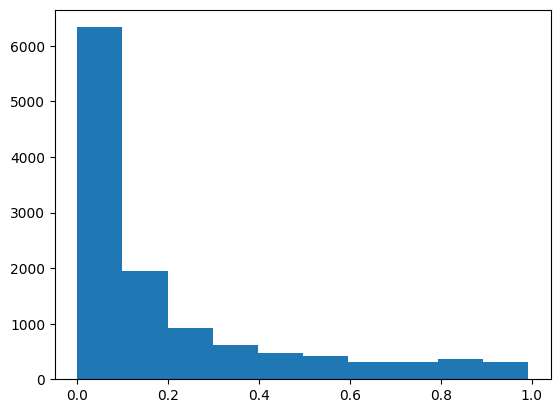

In [ ]:
plt.hist(train_probs[:,1])

якщо б дані були збалансовані можна було б використати **accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.87425

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

**Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_targets, train_preds)

array([[9177,  381],
       [1128, 1314]])

In [ ]:
confusion_matrix(train_targets, train_preds, normalize="true")

array([[0.9601381 , 0.0398619 ],
       [0.46191646, 0.53808354]])

In [ ]:
import seaborn as sns

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    pred_thr = (preds >= 0.5).astype(int)

    accuracy = accuracy_score(targets, pred_thr)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, pred_thr, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return pred_thr

Accuracy: 87.42%


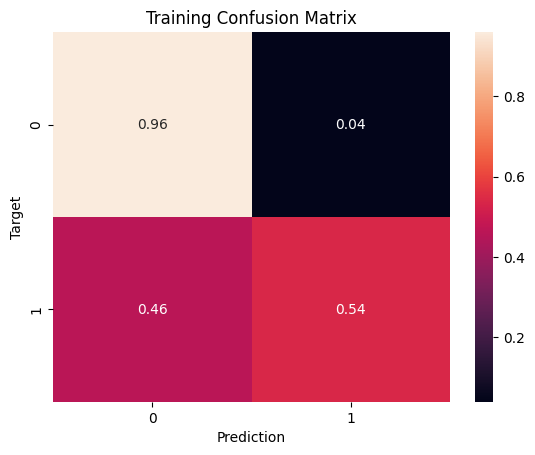

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 87.17%


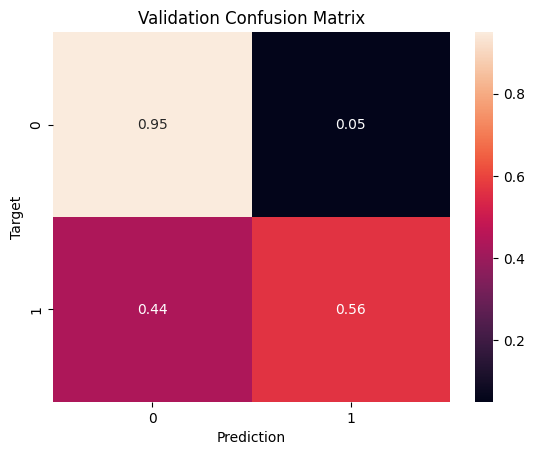

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

**F1 Score**

In [ ]:
from sklearn.metrics import f1_score

def get_f1_score(inputs, targets, name=''):
  preds = model.predict(inputs)
  pred_thr = (preds >= 0.5).astype(int)

  f1_score_ = f1_score(targets, pred_thr)
  print(f"F1 score {name}: {f1_score_:.3f}%")

get_f1_score(X_train, train_targets, 'Training')
get_f1_score(X_val, val_targets, 'Validation')

F1 score Training: 0.635%
F1 score Validation: 0.641%


**ROC Curve та AUROC**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]
  # y_pred = (y_pred_proba >= 0.5).astype(int)

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba)


  # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.3f}')

    # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()


AUROC for Training: 0.882


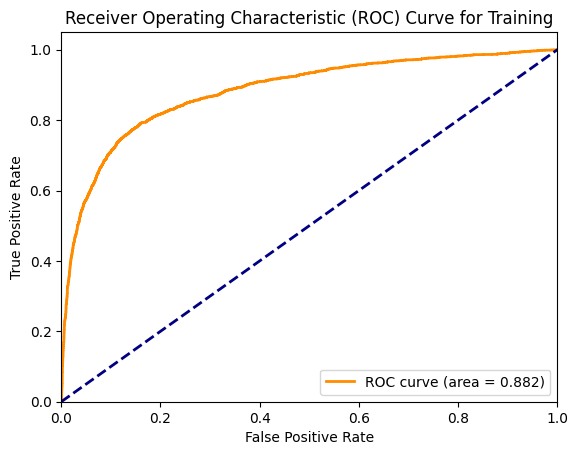

AUROC for Validation: 0.880


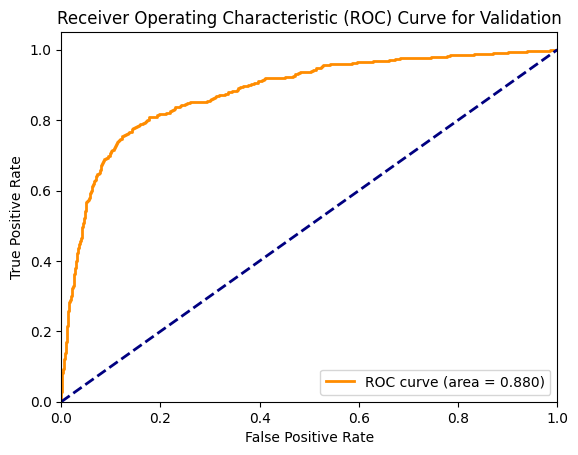

In [ ]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

**Висновок:**

Судячи з метрик

F1 score Training: 0.635%

F1 score Validation: 0.641%


AUROC for Training: 0.882


AUROC for Validation: 0.880

модель може бути **задовільною**, але я ще б спробувала поексперементувати для покращення результатів

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

передбачення моделі, яка передбачає завжди мажоритарний клас

In [ ]:
def predict_mj(inputs, targets):
    majority_class = targets.value_counts().idxmax()
    preds = [majority_class] * len(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy Majority Class Model: {:.2f}%".format(accuracy * 100))

    return preds

In [ ]:

train_preds_mj = predict_mj(X_train, train_targets)

Accuracy Majority Class Model: 79.65%


In [ ]:
val_preds_mj = predict_mj(X_val, val_targets)

Accuracy Majority Class Model: 79.67%


модель , що ми натренували в п.6

In [ ]:
def predict_and_plot(inputs, targets):
    preds = model.predict(inputs)

    pred_thr = (preds >= 0.5).astype(int)

    accuracy = accuracy_score(targets, pred_thr)
    print("Accuracy Model : {:.2f}%".format(accuracy * 100))

In [ ]:
train_preds = predict_and_plot(X_train, train_targets)

Accuracy Model : 87.42%


In [ ]:
val_preds = predict_and_plot(X_val, val_targets)

Accuracy Model : 87.17%


**Висновок**:

помітно, що натренована модель краща ніж та яка визначає завжди позитивне значення, але ця різниця менше 10%. Думаю що ще є куди покращувати модель, так як балансування даних дуже впливаж на прогноз та навчання.

Спираючись на точність то по цій метрики модель **задовільна**, але я б не оціюнявала незбалансовані дані таким чином

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [ ]:
import joblib

log_reg = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoder_cols
}

In [ ]:
joblib.dump(log_reg, "log_reg.joblib")

['log_reg.joblib']

In [ ]:
model_2 = joblib.load("log_reg.joblib")

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoder_cols] = encoder.transform(input_df[categorical_cols])
    X_input = pd.concat([input_df[numeric_cols],input_df[encoder_cols]], axis=1)
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [ ]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])

array([0.00654092, 0.0366679 , 0.37111937, 0.37653484, 0.97577854])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [ ]:

test_csv = "/content/bank-customer-churn-prediction-dlu-course-c-2/test.csv"
test_raw_df = pd.read_csv(test_csv)
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09


In [ ]:
predict_test = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)

In [ ]:
predict_test


array([0.03630291, 0.00774932, 0.02662523, ..., 0.02662522, 0.02676547,
       0.02676547])

In [ ]:
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15000,15594796.0,Chu,-1.0311,Germany,Male,-0.327273,0.000002,1.714295e-27,-0.497942,1.0,1.0,-0.000058,0.0,1.0,0.0,0.0,1.0,0.034104
1,15001,15642821.0,Mazzi,-1.0311,France,Male,-0.327273,0.000005,0.000000e+00,-0.496571,1.0,1.0,-0.000058,1.0,0.0,0.0,0.0,1.0,0.006962
2,15002,15716284.0,Onyekachi,-1.0311,France,Male,-0.327273,0.000008,0.000000e+00,-0.496571,1.0,0.0,-0.000058,1.0,0.0,0.0,0.0,1.0,0.023966
3,15003,15785078.0,Martin,-1.0311,Spain,Male,-0.327273,0.000003,0.000000e+00,-0.497942,1.0,1.0,-0.000058,0.0,0.0,1.0,0.0,1.0,0.006660
4,15004,15662955.0,Kenechukwu,-1.0311,Spain,Male,-0.327273,0.000008,0.000000e+00,-0.496571,1.0,1.0,-0.000058,0.0,0.0,1.0,0.0,1.0,0.006346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,-1.0311,Spain,Male,-0.327273,0.000010,0.000000e+00,-0.496571,1.0,1.0,-0.000058,0.0,0.0,1.0,0.0,1.0,0.006346
9996,24996,15739271.0,Clements,-1.0311,Spain,Male,-0.327273,0.000009,0.000000e+00,-0.496571,1.0,1.0,-0.000058,0.0,0.0,1.0,0.0,1.0,0.006346
9997,24997,15756743.0,Chidiebere,-1.0311,France,Male,-0.327273,0.000009,0.000000e+00,-0.496571,1.0,0.0,-0.000058,1.0,0.0,0.0,0.0,1.0,0.023965
9998,24998,15680167.0,Yermakova,-1.0311,France,Male,-0.327273,0.000006,1.700470e-27,-0.497942,1.0,0.0,-0.000058,1.0,0.0,0.0,0.0,1.0,0.025129


In [ ]:
exited_col = "Exited"
test_raw_df[exited_col] = predict_test

In [ ]:
test_raw_df.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15000,15594796.0,Chu,-1.0311,Germany,Male,-0.327273,0.00002,3.596031e-22,-0.493827,1.0,1.0,-0.000058,0.0,1.0,0.0,0.0,1.0,0.034104
1,15001,15642821.0,Mazzi,-1.0311,France,Male,-0.327273,0.00005,0.000000e+00,-0.489712,1.0,1.0,-0.000058,1.0,0.0,0.0,0.0,1.0,0.006962
2,15002,15716284.0,Onyekachi,-1.0311,France,Male,-0.327273,0.00008,0.000000e+00,-0.489712,1.0,0.0,-0.000058,1.0,0.0,0.0,0.0,1.0,0.023966
3,15003,15785078.0,Martin,-1.0311,Spain,Male,-0.327273,0.00003,0.000000e+00,-0.493827,1.0,1.0,-0.000058,0.0,0.0,1.0,0.0,1.0,0.006660
4,15004,15662955.0,Kenechukwu,-1.0311,Spain,Male,-0.327273,0.00008,0.000000e+00,-0.489712,1.0,1.0,-0.000058,0.0,0.0,1.0,0.0,1.0,0.006346
5,15005,15759066.0,Genovesi,-1.0311,France,Male,-0.327273,0.00007,1.521873e-22,-0.493827,1.0,0.0,-0.000058,1.0,0.0,0.0,0.0,1.0,0.025129
6,15006,15754926.0,Haddon,-1.0311,France,Female,-0.327273,0.00000,0.000000e+00,-0.489712,1.0,0.0,-0.000058,1.0,0.0,0.0,1.0,0.0,0.054913
7,15007,15664802.0,Chiang,-1.0311,France,Male,-0.327273,0.00004,0.000000e+00,-0.489712,0.0,0.0,-0.000058,1.0,0.0,0.0,0.0,1.0,0.028767
8,15008,15757537.0,Iweobiegbulam,-1.0311,Germany,Male,-0.327273,0.00003,3.826471e-22,-0.489712,1.0,0.0,-0.000058,0.0,1.0,0.0,0.0,1.0,0.105386
9,15009,15674928.0,Hoolan,-1.0311,France,Female,-0.327273,0.00008,0.000000e+00,-0.489712,1.0,0.0,-0.000058,1.0,0.0,0.0,1.0,0.0,0.054910


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [ ]:
sample_path = "/content/bank-customer-churn-prediction-dlu-course-c-2/sample_submission.csv"
sample_df = pd.read_csv(sample_path)
sample_df

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5
...,...,...
9995,24995,0.5
9996,24996,0.5
9997,24997,0.5
9998,24998,0.5


In [ ]:
sample_df.drop(columns=["Exited"])

,id
0,15000
1,15001
2,15002
3,15003
4,15004
...,...
9995,24995
9996,24996
9997,24997
9998,24998


In [ ]:
sample_df["Exited"]= predict_test.round(1)

In [ ]:
sample_df.head(5)

,id,Exited
0,15000,0.0
1,15001,0.0
2,15002,0.0
3,15003,0.0
4,15004,0.0


In [ ]:
sample_df.to_csv("submission_log_reg.csv", index=False)

In [ ]:
check_file = pd.read_csv("submission_log_reg.csv")
check_file

,id,Exited
0,15000,0.0
1,15001,0.0
2,15002,0.0
3,15003,0.0
4,15004,0.0
...,...,...
9995,24995,0.0
9996,24996,0.0
9997,24997,0.0
9998,24998,0.0
